In [4]:
%matplotlib inline
import os, sys, glob
import numpy as np
from matplotlib import pyplot as plt
import mrcfile
# package up sometime?
sys.path.append('../../src/')
import relion_reader as rln

# Read star files from RELION

In [5]:
starfile='/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/particles.star'

In [6]:
data = rln.star_reader(starfile)

Number of particles in this star file: 8278
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']


In [ ]:
data.anglerot

In [ ]:
data['metadata'].keys()

In [13]:
zu = np.array(data['metadata']['_rlndefocusu']).astype(float)
zv = np.array(data['metadata']['_rlndefocusv']).astype(float)

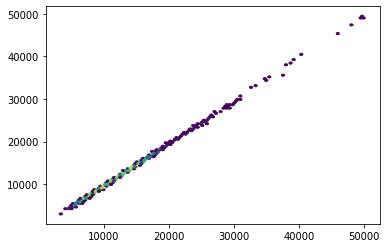

In [12]:
plt.hexbin(zu,zv, mincnt=1)

In [ ]:
data['test'].keys()

In [ ]:
if '_rlnphaseshift' in data['test']:
    print('huhu')

In [ ]:
reference_path = '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/'
iframe, relpath = data['metadata']['_rlnimagename'][0].split('@')
print(int(iframe))
absolute_path = reference_path+relpath.split('/')[2]+'/'+relpath.split('/')[3]
print(absolute_path)

In [ ]:
for img in data['metadata']['_rlnimagename']:
    iframe, path = img.split('@')
    print(np.int(iframe), path.split('/')[-1])

In [ ]:
crd = np.stack((crdx, crdy, crdy))

In [ ]:
crd.shape

In [ ]:
plt.plot(crd[0,:],crd[2,:], '.')

In [ ]:
datatest = np.ones((2,12,12))

In [ ]:
datatest[1,...].shape